<a href="https://colab.research.google.com/github/Pancholeon/Portafolio_Python/blob/main/An%C3%A1lisis_del_premio_nobel_(1901_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del premio nobel (1901-2020)


# Introducción

El 27 de noviembre de 1895, Alfred Nobel firmó su testamento final en París. Cuando se abrió después de su muerte, el testamento causó mucha controversia, ya que Nobel había dejado gran parte de su fortuna para el establecimiento de un premio.

Alfred Nobel dicta que la totalidad de su patrimonio restante debe ser utilizada para dotar de "premios a aquellos que, durante el año precedente, hayan conferido el mayor beneficio a la humanidad".

Cada año, se otorga el Premio Nobel a científicos y eruditos en las categorías de química, literatura, física, fisiología o medicina, economía y paz.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Veamos qué patrones podemos encontrar en los datos de los premios Nobel pasados. ¿Qué podemos aprender sobre el premio Nobel y nuestro mundo en general?

### Actualizar plotly (solo Google Colab Notebook)
Google colab puediera no correr la última versión de plotly, por lo que si trabajamos en Google Colab debemos installar la última versión de la paquetería y reiniciar el entorno de ejecución.


In [ ]:
%pip install --upgrade plotly

### Importar las paqueterías


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm

### Formato a cómo se desplegarán los números

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Leemos la información del archivo csv


In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Advertencia: Los días de nacimiento para Michael Houghton, Venkatraman Ramakrishnan, y Nadia Murad son desconocidos; por la autora de este dataset comenta que los sustituyó con una estimación de mitad de año del 2 de julio.

# Exploración y limpieza de la información.

Como parte de la exploración preliminar, nos planteamos las siguientes preguntas:
* ¿Cuáles son las dimensiones del dataframe creado?
* ¿Cuántas columnas y renglones tiene?
* ¿Cómo se llaman las columnas?
* ¿En qué año se entregó el primer premio nobel?
* ¿En qué año fue el último premio nobel del dataset?

In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Descripción del dataframe Nobel**

* birth_date: fecha en formato string.
* motivation: describe el tema por el cual se hizo acredor al premio.
* prize_share: describe la fracción por la cual se dividió el premio.
* laureate_type: individual o por organización.
* birth_country: país de nacimiento que pudieran no existir en la actualidad.
* birth_country_current: nombre del país actual donde nació la persona u organización.
* ISO: codigo internacional de tres digitos para la variable birth_country_current.
* organization_name : institución de investigación en donde se produjo el descubrimiento.
* organization_city: ubicación de la institución de investigación.

Se observa que la serie histórica del dataset abarca desde 1901 hasta el 2020.

**Preguntas importantes de resolver previo al análisis**:
* Exiten valores duplicados o NaN en el dataset?
* Cuáles columnas tienden a tener valores NaN?
* Cuántos valores NaN hay por columna?
* Por qué estas columnas tienen valores NaN?

### Revisar si existen valores duplicados

In [ ]:
print(f'Existen duplicados? {df_data.duplicated().values.any()}')

Existen duplicados? False


### Revisar si existen valores NaN y donde se localizan.

In [ ]:
print(f'Existen valores NaN? {df_data.isna().values.any()}')

Existen valores NaN? True


In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Aquí es donde inicia lo intersante, encontrar la razón por el cual no existen valores NaN en el año de nacimiento y en el nombre, ciudad y país de las organizaciones. Procedemos a filtrar por cada uno de las columnas para visualizar el comportamiento de los NaN.

In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


Observamos que todos los NaN presentes en la tabla anterior, se muestra que son organizaciones relacionadas con la paz, instituciones como naciones unidas, medicos sin fronteras, energía atómica, entre otros.

In [ ]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


Ahora bien, si exploramos los NaN en la columna organization_name, observamos que existen premios otogrados a personas que no están afiliadas a alguna universidad o instituto de investigación; se incluyen categorías como literatura y paz en las filas donde se encuentran los valores NaN.

### Conversión de datos por columna.
* Convertir la columna 'birth_date' column a un objeto de Pandas 'Datetime'
* Añadir un campo calculado que permita ver en número decimal el porcentaje que tiene el laureado o premiado.

#### Convertir el año de nacimiento y el año a Datetime para facilitar el análisis.


In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [ ]:
valores_sep = df_data.prize_share.str.split('/', expand=True)
numerador= pd.to_numeric(valores_sep[0])
denominador = pd.to_numeric(valores_sep[1])
df_data['share_pct'] = numerador / denominador

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly gráfica de dona: Porcentaje de hombres vs mujeres apremiados con el Nobel.

In [ ]:
sexo_nobel= df_data.sex.value_counts()
fig = px.pie(labels=sexo_nobel.index,
             values=sexo_nobel.values,
             title="Porcentaje de hombres vs mujeres apremiados con el Nobel",
             names=sexo_nobel.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent') #posición de los labels dentro del gráfico.

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Se observa que más del 90% de los premios nobel han sido otorgados a hombres, existiendo solamente un 6.21% de mujeres ganadoras de este premio.

# Quienes fueron las primeras 3 mujeres en ganar un premio Nobel?

**Challenge**:
* Quiénes fueron las primeras tres mujeres galardonadas con un premio Nobel?
* Cuál fue el motivo del premio?
* Pertenecían a alguna organización? De donde son originarias?

In [ ]:
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


Al construir la tabla con los filtros necesarios, se aprecia diversidad en la categoría de los premios Nobel ganados por mujeres, es de reconocer que la primera mujer en ganar un premio Nobel fue Marie Curier por sus aportaciones a la Física. Adicional, se puede deducir que no pertenecían a ninguna organización, probablemente por la fecha en que realizaron su descubrimiento y su posterior otorgamiento del premio.

# ¿Existen personas que hayan ganado más de un premio Nobel?

In [ ]:
es_ganador = df_data.duplicated(subset=['full_name'], keep=False)
ganadores_multiples = df_data[es_ganador]
print(f'Hay {ganadores_multiples.full_name.nunique()} ganadores que han sido galardonados con el premio Nobel más de una vez.')

Hay 6 ganadores que han sido galardonados con el premio Nobel más de una vez.


In [ ]:
subset_col = ['year', 'category', 'laureate_type', 'full_name']
ganadores_multiples[subset_col]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


Se aprecia que el Comité Internacional de la Cruz Roja ha sido quien ha ganado el mayor número de premios Nobel, todos en la categoría de la paz.

# Número de premios por categoría.

* En cuantas categorías ha habido premios Nobel?
* Cuál es la categoría que ha tenido más premios Nobel?
* Cuál es la categoría que ha tenido menos premios Nobel?

In [ ]:
print(f'Existen {len(pd.unique(df_data.category))} categorías en los premios Nobel')

Existen 6 categorías en los premios Nobel


In [ ]:
categories= df_data.category.value_counts()
v_Bar= px.bar(categories, categories.index,
              y=categories.values,
              color= categories.values,
              color_continuous_scale='Aggrnyl',
              title= "Número de Premios por categoría",
              text_auto=True)
v_Bar.update_layout(xaxis_title= "Categoría del premio Nobel",
                    yaxis_title='Número de premios',
                    coloraxis_showscale=False)
v_Bar.show()

Según se aprecia en el gráfico anterior, se puede concluir que la categoría de Medicina ostenta la mayor cantidad de premios Nobel en la historia. Cercanos en número se encuentran los premios Nobel de Física, y en tercer lugar se ubica la categoría de Química.

**Curiosidad**:
* Sabiendo que Economía es la que menor número de premios Nobel tiene, quien fue el primero o la primera en ganar dicho galardon?

In [ ]:
df_data[df_data.category == 'Economics'].sort_values('year', ascending=True).head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50


Fueron hasta finales de loos años 60, cuando los premios Nobel fueron otorgados a economistas destacados en sus ámbitos de estudio.

# Hombres y mujeres ganadores por categoría.

In [ ]:
cat_por_sexo = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_por_sexo.sort_values('prize', ascending=False, inplace=True)
cat_por_sexo

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:
v_bar_sep = px.bar(x = cat_por_sexo.category,
                     y = cat_por_sexo.prize,
                     color = cat_por_sexo.sex,
                     title='Número de premios Nobel por categoría separado en hombres y mujeres.',
                     text_auto=True)

v_bar_sep.update_layout(xaxis_title='Categoría del premio Nobel',
                          yaxis_title='Número de premios')
v_bar_sep.show()

A primera vista, se evidencia una marcada disparidad en el número de premios Nobel otorgados a hombres en comparación con aquellos concedidos a mujeres. Destaca que la categoría en la que se ha reconocido a un mayor número de mujeres con el premio Nobel es la paz, mientras que la Economía figura como la categoría con la menor cantidad de premios Nobel concedidos a mujeres.

# Número de premios otorgados a lo largo de los años.

**Challenge**:
Existe algún patron que indique mayor premiación en años recientes que cuando el premio fue creado?
Cuál es el comportamiento del promedio de premios Nobel en un periodo agrupado de 5 años?

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [ ]:
num_premios = df_data.groupby(by='year').count().prize
num_premios

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [ ]:
prom_cinco_anios = num_premios.rolling(window=5).mean()
prom_cinco_anios

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

Lo que realiza el código anterior, es utilizar el método rolling para crear una ventana que se desplaza dentro de una serie temporal, en este caso el número de premios con una tamaño de ventana de 5 años. En consecuencia se presenta un promedio movil de 5 años del número de premios cada año. Se utiliza la media movil ya que ayuda a suavizar la serie temporal y resaltar tendencias a largo plazo, haciendo más facil identificar ciertos patrones a lo largo del tiempo.

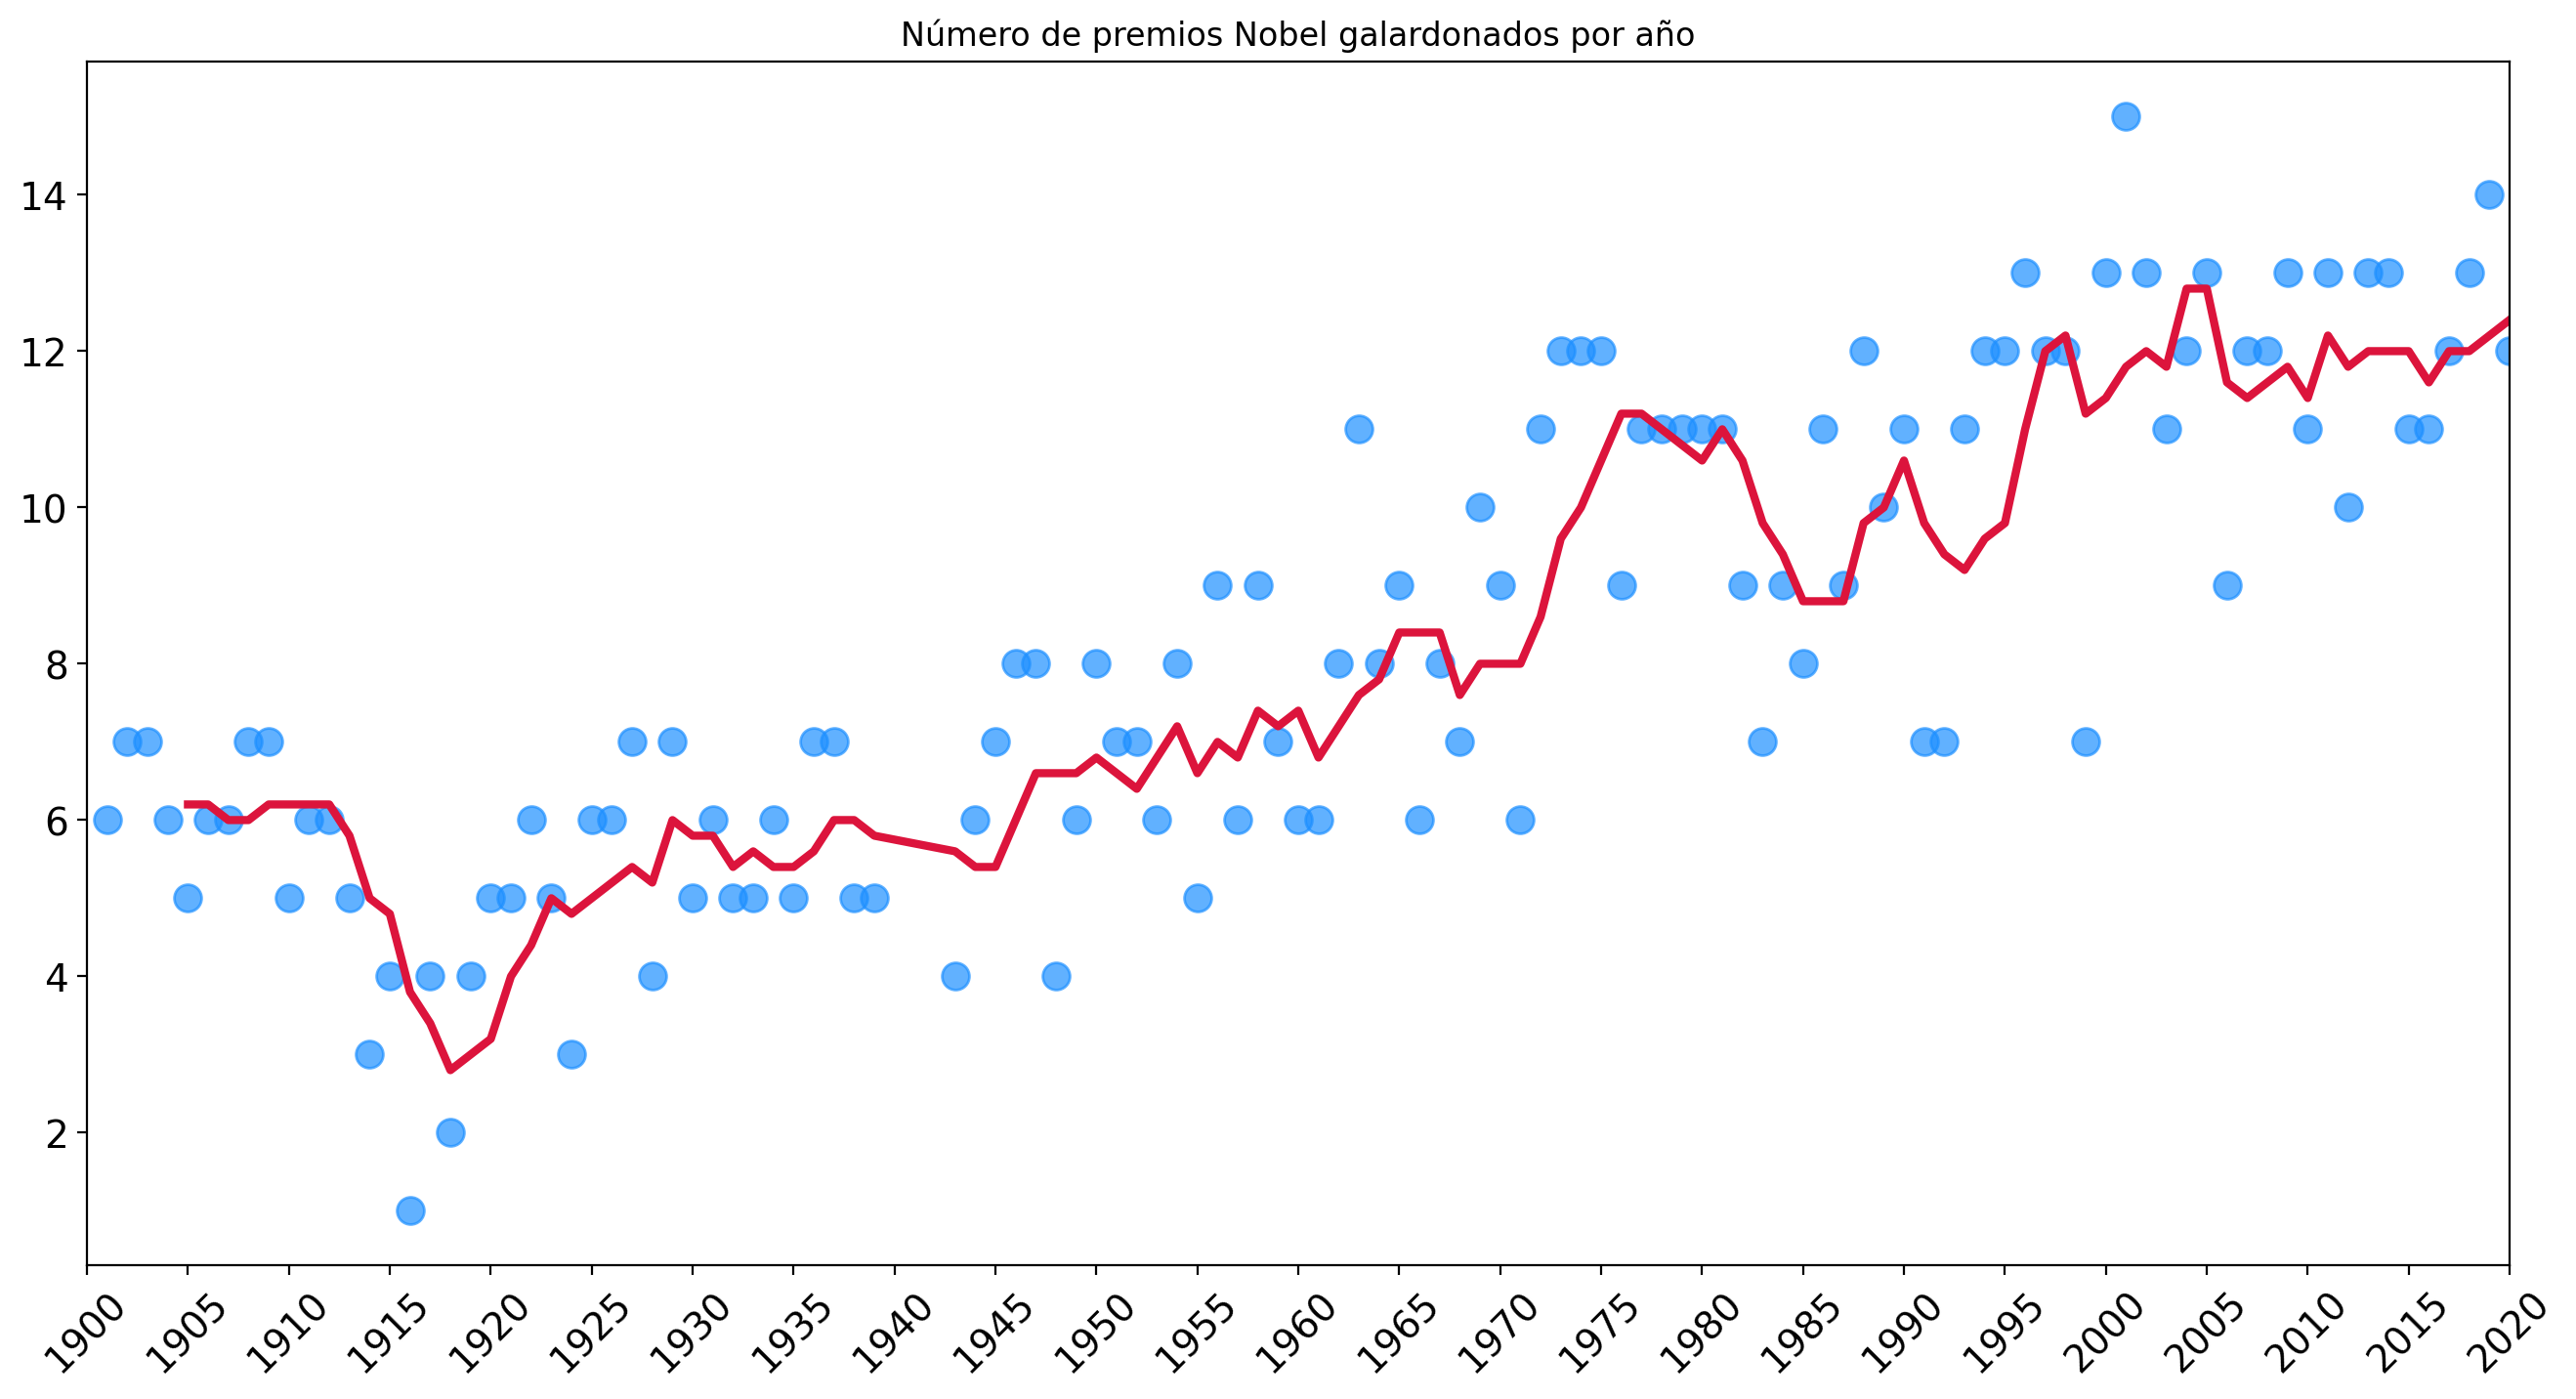

In [ ]:
plt.figure(figsize=(16,8), dpi= 200)
plt.title('Número de premios Nobel galardonados por año')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=num_premios.index,
           y=num_premios.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(num_premios.index,
        prom_cinco_anios.values,
        c='crimson',
        linewidth=3,)

plt.show()

Se observa un comportamiento un tanto variante, se observa una disminución importante en el quinquenio de 1915-1920, probablemente asociado al conflicto armado de la primera guerra mundial. De igual manera se aprecia una disminución similar en los años 1940-1945, que coincide con el periodo en el que se desarrolló la segunda guerra mundial.

# Existen más premios entregados que antes?

In [ ]:
media_share_por_anio = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
media_share_por_anio

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [ ]:
media_share_por_cinco_anio = media_share_por_anio.rolling(window=5).mean()
media_share_por_cinco_anio

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


Utilizando la paquetería Matplotlib, se generan los ejes x, y para iniciar con la grafica planteada. Adicional se hace una copia de la variable ax1 para crear un segundo eje y; lo anterior sirve para graficar el año y la media del porcentaje calculada en una ventana de cada 5 años.

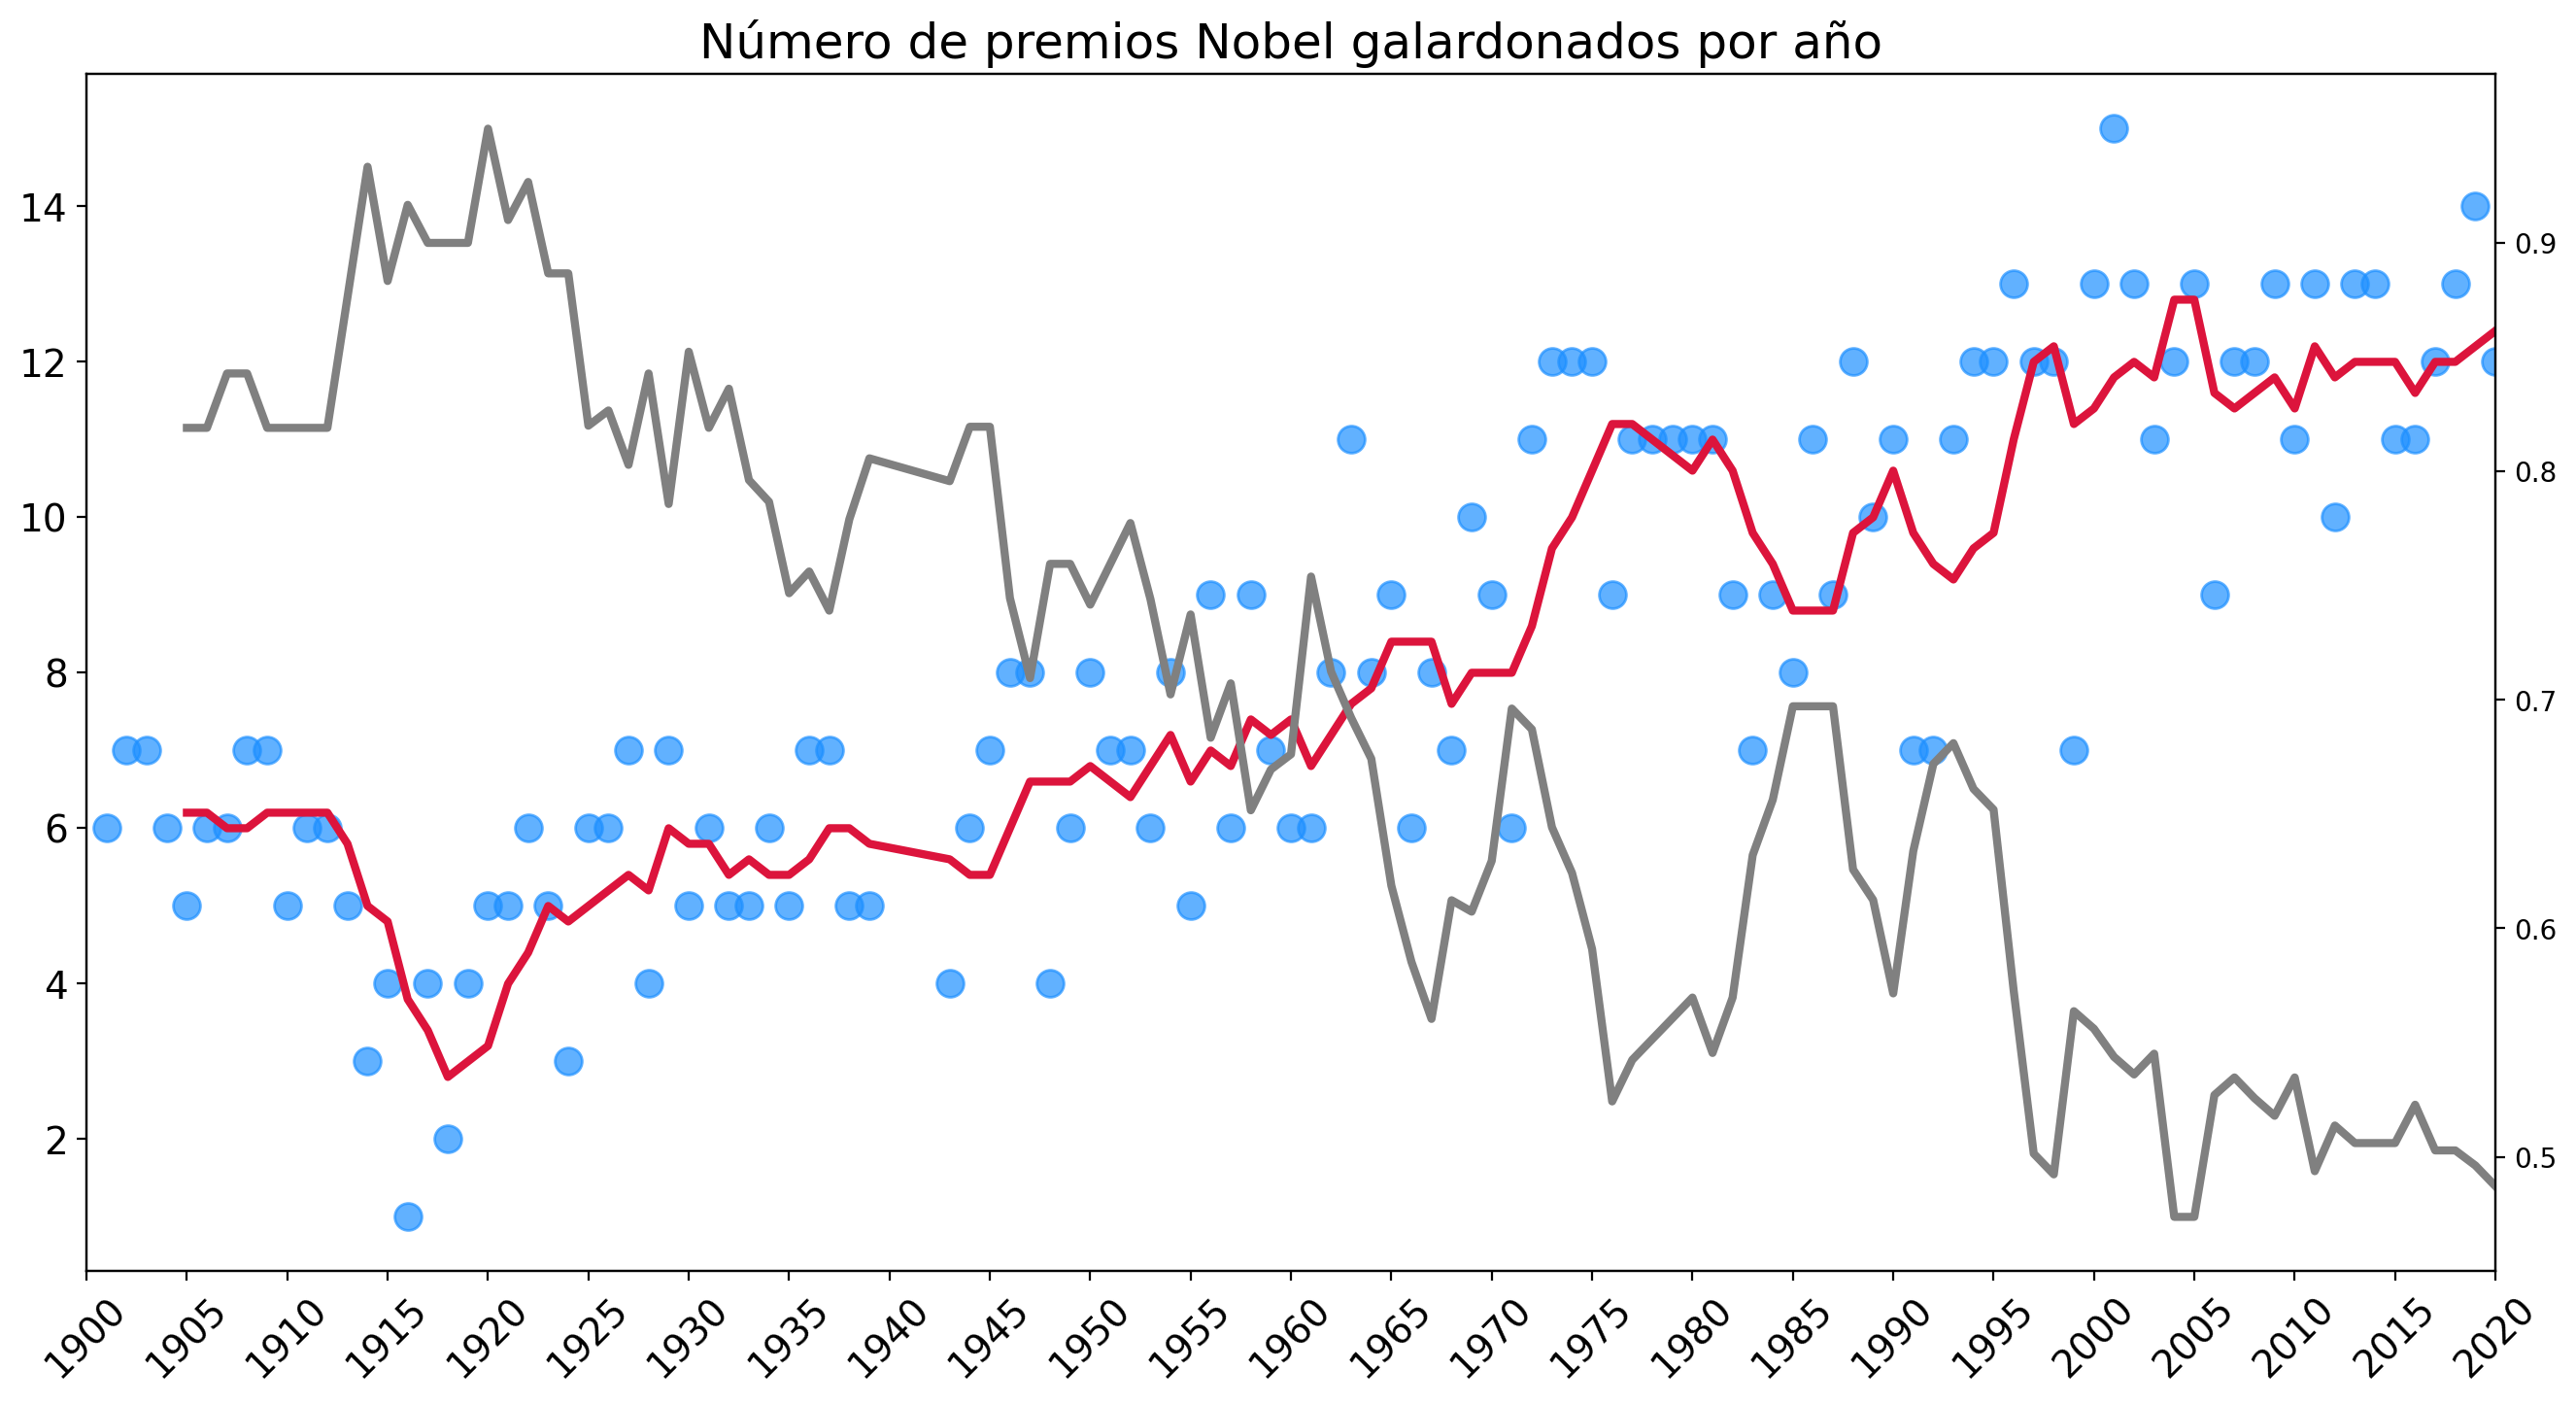

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Número de premios Nobel galardonados por año', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=num_premios.index,
           y=num_premios.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(num_premios.index,
        prom_cinco_anios.values,
        c='crimson',
        linewidth=3,)


ax2.plot(num_premios.index,
        media_share_por_cinco_anio.values,
        c='grey',
        linewidth=3,)

plt.show()

Complementando el análisis anterior, se observa una tendencia en cuanto a la media de la cantidad de premios otorgados y la media del porcentaje de premios entregados, observando que a medida que aumentaba el número de premios otorgados más premios eran repartidos entre más personas, disminuyendo la cantidad del campo calculado share_pct.

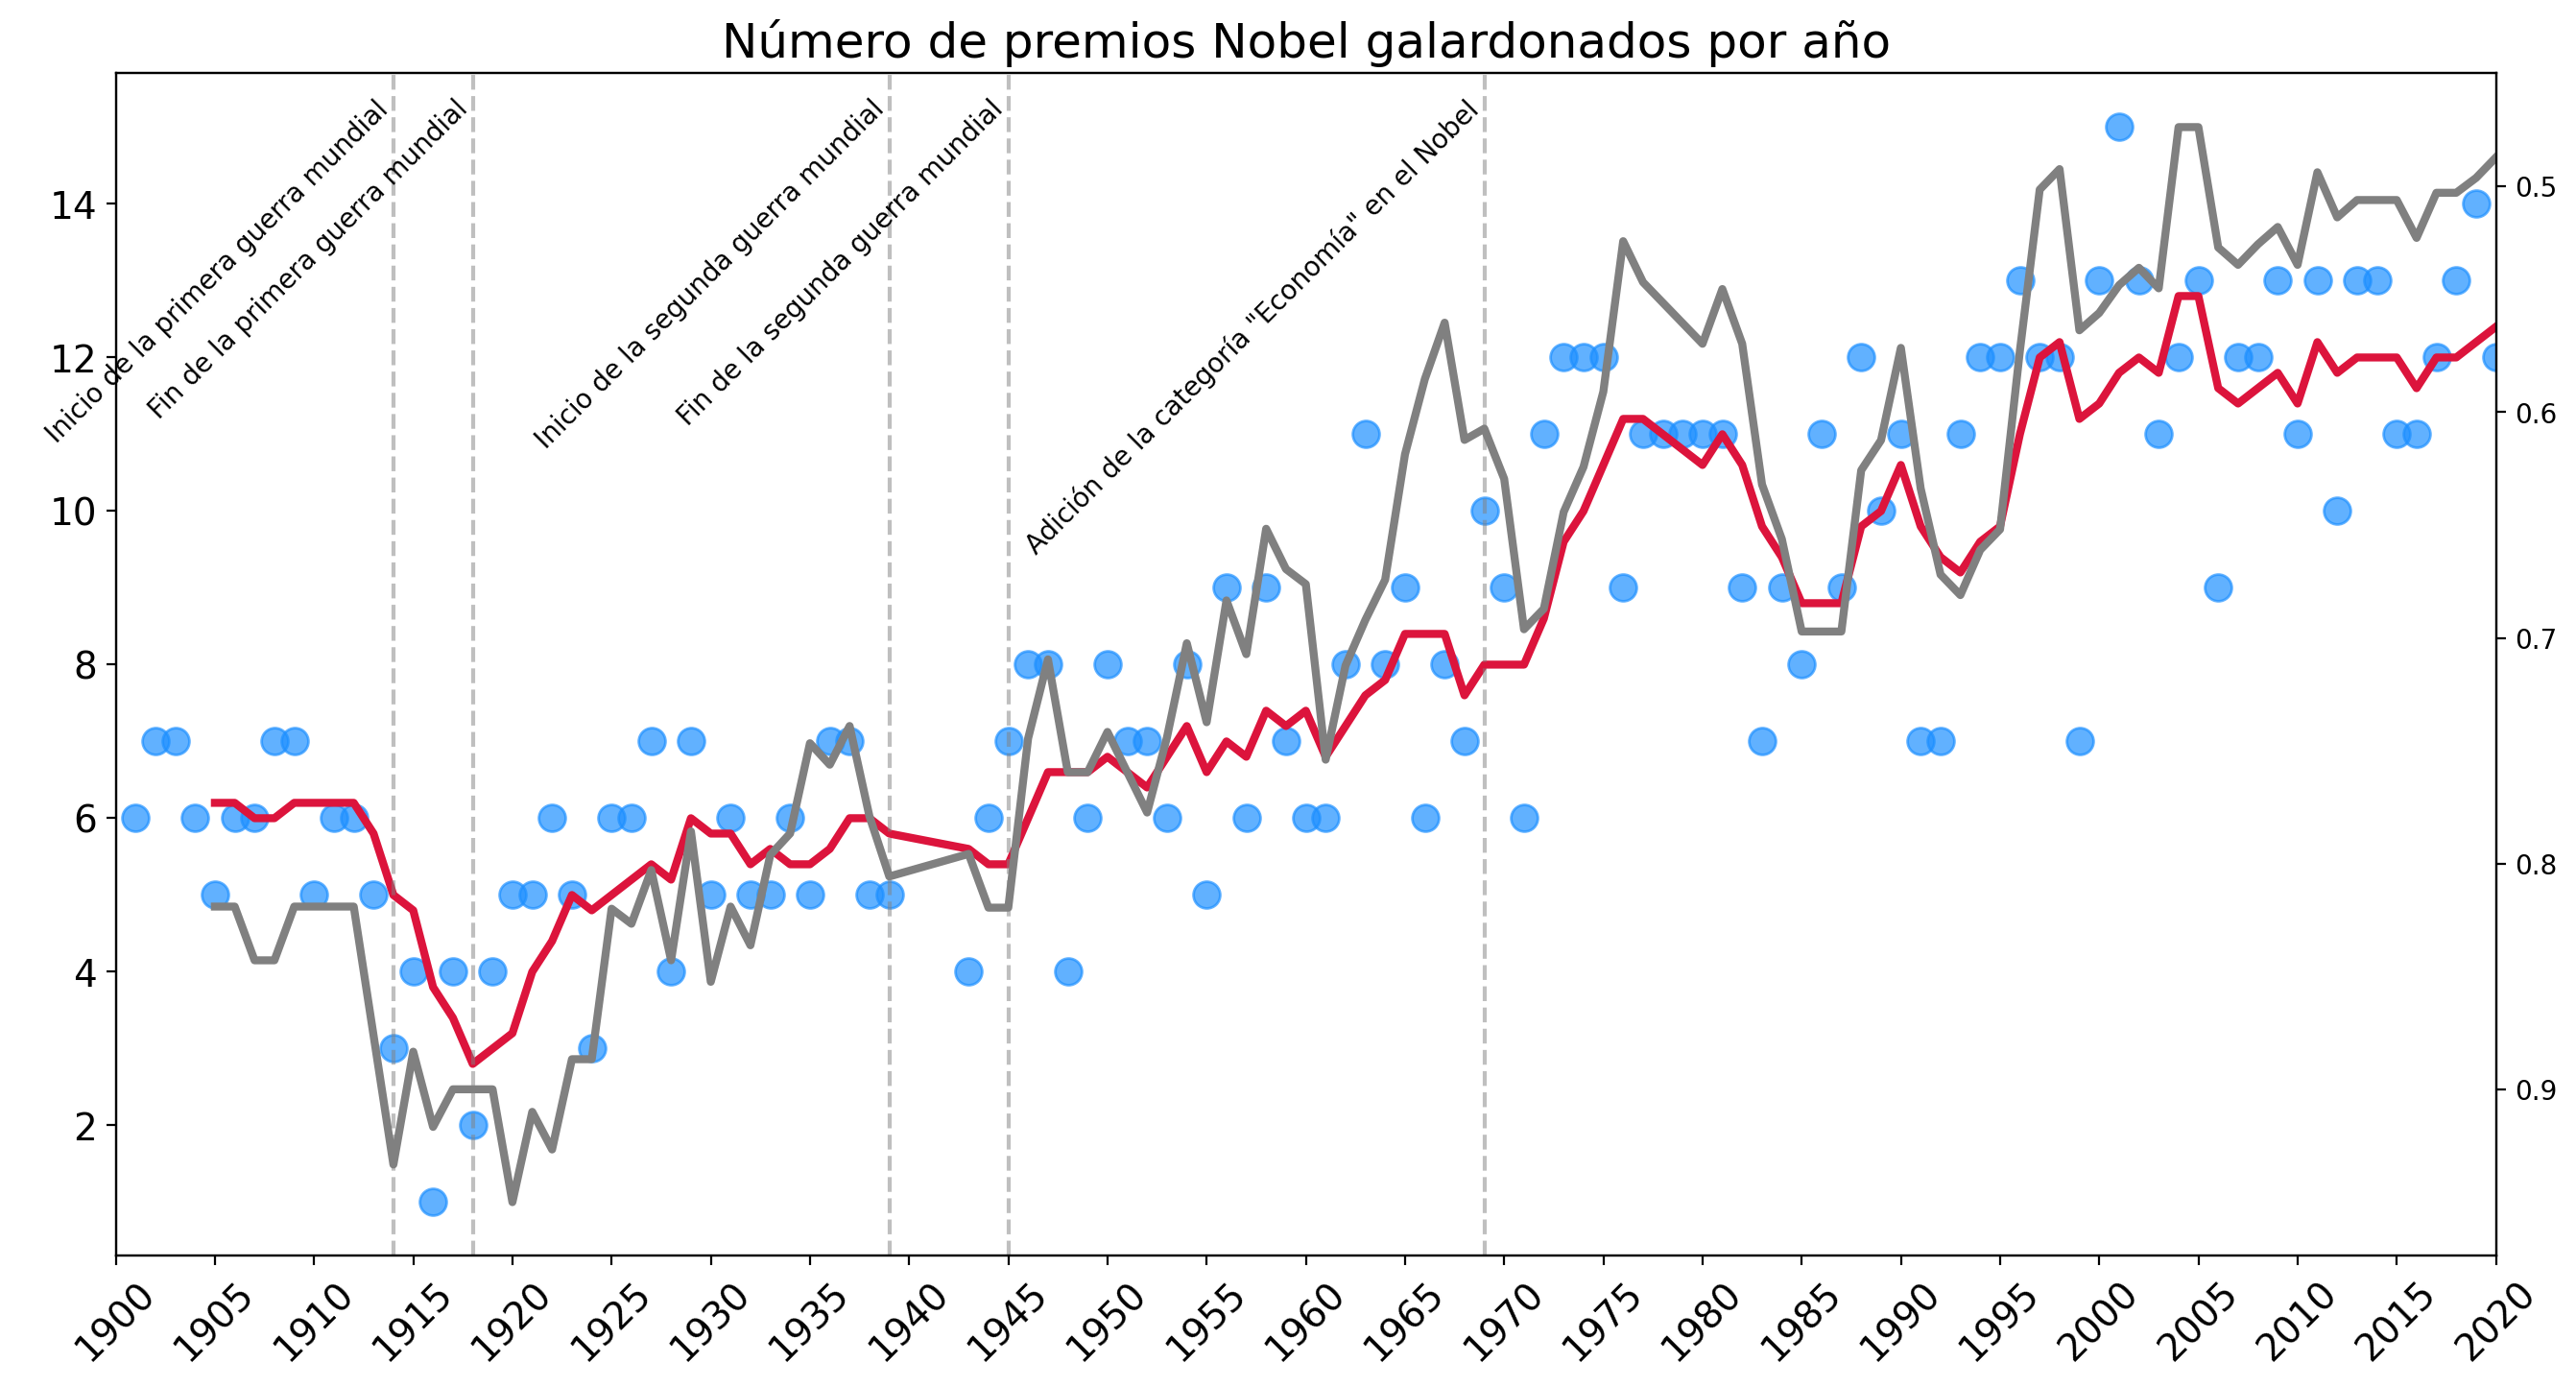

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Número de premios Nobel galardonados por año', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

eventos_importantes = {
    1914: 'Inicio de la primera guerra mundial',
    1918: 'Fin de la primera guerra mundial',
    1939: 'Inicio de la segunda guerra mundial',
    1945: 'Fin de la segunda guerra mundial',
    1969: 'Adición de la categoría "Economía" en el Nobel',
    # Agrega más eventos según sea necesario
}
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax2.invert_yaxis()

ax1.scatter(x=num_premios.index,
           y=num_premios.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(num_premios.index,
        prom_cinco_anios.values,
        c='crimson',
        linewidth=3,)


ax2.plot(num_premios.index,
        media_share_por_cinco_anio.values,
        c='grey',
        linewidth=3,)

for fecha, descripcion in eventos_importantes.items():
    ax1.axvline(x=fecha, color='grey', linestyle='--', alpha=0.5)
    ax1.text(fecha, ax1.get_ylim()[1], f'\n{descripcion}', rotation=45, va='top', ha='right', fontsize=10, color='black')


plt.show()

Para visualizar de manera clara la relación antes mencionada, se puede invertir el eje ax2 para observar la tendencia del incremento de número de premios Nobel otorgados aumenta el número de personas con las cuales se reparte el premio. Se aprecia el impacto que tuvieron los hechos históricos y la adición de nuevas categorías para ser galardonadas por el premio Nobel.

# Países con el mayor número de premios Nobel.

* Crear un dataframe con los 20 países con mayor número de premios nobel.
* Es mejor utilizar la variable `birth_country`,`birth_country_current` o `organization_country`?
* Cuáles son los problemas potencial cuando se utiliza la variable 'birth_country' o cualquier otra? ¿Qué problema resultaría la menos problemática?
* Cuál es el ranking de los 20 países con mayor número de premios?

In [ ]:
df_data[['birth_country','birth_country_current','organization_country']].head(20)

,birth_country,birth_country_current,organization_country
0,Netherlands,Netherlands,Germany
1,France,France,NaN
2,Prussia (Poland),Poland,Germany
3,France,France,NaN
4,Switzerland,Switzerland,NaN
5,Prussia (Germany),Germany,Germany
6,Prussia (Germany),Germany,Germany
7,Schleswig (Germany),Germany,NaN
8,India,India,United Kingdom
9,Switzerland,Switzerland,NaN


Si se observan las filas del dataframe anterior, se identifican países que ya no existen. Estos incluyen Prussia, Russian Empire, Schleswig, por poner un ejemplo. Por lo tanto utilizar la variable `birth_country_current` otorga el nombre actual del país que controla la ciudad donde nació el premiado o la premiada. Ahora bien, lo anterior no va a determinar la nacionalidad del individuo ganador, ya que algunas personas viajan por el mundo y dan a luz mientras están en el extranjero.

In [ ]:
top_20 = df_data.groupby(['birth_country_current'],
                                  as_index=False).agg({'prize': pd.Series.count})

In [ ]:
top_20.sort_values(by='prize',inplace=True)
top_20= top_20[-20:]
top_20

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [ ]:
bar = px.bar(x = top_20.prize, # index = category name
             y = top_20.birth_country_current, # count
             title='Top 20 de países por número de premios',
             color=top_20.prize,
             color_continuous_scale='Viridis',
             orientation='h')

bar.update_layout(xaxis_title='Número de Premios',
yaxis_title='País',
coloraxis_showscale=False)

bar.show()

# Mapa coroplejico para mostrar el número de premios ganados por país



In [ ]:
df_paises = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_paises.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [ ]:
map_mundial = px.choropleth(df_paises,
                          locations='ISO',
                          color='prize',
                          hover_name='birth_country_current',
                          color_continuous_scale=px.colors.sequential.matter)

map_mundial.update_layout(coloraxis_showscale=True,)

map_mundial.show()

# Qué cateogrías han ganado un premio nobel en los diferentes países del mundo?

* El objetivo es identificar por país el número de premios nobel que tienen por cada una de las categorías vistas con anterioridad.
* A partir de este análisis, se puede identificar qué categorías ganadoras del premio nobel tiene cada uno de los países del dataframe.

In [ ]:
cat_pais = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_pais.sort_values(by='prize',ascending=False, inplace=True)
cat_pais

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
df_union = pd.merge(cat_pais, top_20, on='birth_country_current')
df_union.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
df_union.sort_values(by='total_prize', inplace=True)
df_union

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [ ]:
pais_bar = px.bar(x=df_union.cat_prize,
                       y=df_union.birth_country_current,
                       color=df_union.category,
                       orientation='h',
                       title='Top de países por número de premios y categoría')

pais_bar.update_layout(xaxis_title='Número de Premios',
                            yaxis_title='País')
pais_bar.show()

A simple vista, se observa la predominancia que tiene Estados Unidos de América en los premios Nobel. Países como Alemania y Inglaterra tienen cifras similares en catgorías como física y química. Por su parte, la categoría de Economía no se distribuye de manera equitativa en todos los países, siendo Estados Unidos, el país con el mayor número de premios Nobel con 39 galardones.

### Número de premios ganados por cada uno de los países durante 1901 hasta 2020.
* En qué momento Estados Unidos empieza a eclipsar a cualquier otro país en términos de numero de premios ganados?
* Qué país o países se encontraban liderando la cima previo al auge de Estados Unidos?



In [ ]:
premiosgan_p = df_data.groupby(['year','birth_country_current'],
                               as_index=False).agg({'prize': pd.Series.count})
premiosgan_p = premiosgan_p.sort_values('year')[['year', 'birth_country_current', 'prize']]
premiosgan_p

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
617,2019,Germany,1
625,2020,United Kingdom,2
623,2020,France,1
624,2020,Germany,1


In [ ]:
cum_premios = premiosgan_p.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cum_premios.reset_index(inplace=True)
cum_premios

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cum_premios,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Año',
                      yaxis_title='Número de premios')

l_chart.show()

Lo que se aprecia en la gráfica anterior es que Estados unidos empezó a despegar después de la Segunda Guerra Mundial, que arrasó a muchos países de europa. Antes de este suceso histórico, el premio Nobel era prácticamente un asunto europeo, ya que muy pocos eran los galardonados de otras partes del mundo. Esto ha tenido un cambio drástico en los últimos 40 años, teniendo, hoy en día, una mayor representación de los países que en el inicio del siglo XX. Existe un comportamiento un tanto curioso, ya que Reino Unido y Alemania, intercambiaron ranking durante las décadas de los 70 y 90 respecto al número total de premios ganados.

# Cuáles son las organizaciones top en investigación y desarrollo para los premios Nobel?

* Qué organizaciones están en el top 20?
* Cuántos ganadores del premio Nobel están afiliados a Universidades como Chicago o Harvard?

In [ ]:
top_20_uni=df_data.organization_name.value_counts()[:20]
top_20_uni.sort_values(ascending=True, inplace=True)
top_20_uni

Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [ ]:
bar = px.bar(x = top_20_uni.values,
             y = top_20_uni.index,
             title='Top 20 de Institutos de Investigación y Desarrollo por Número de Premios',
             color=top_20_uni.values,
             color_continuous_scale=px.colors.sequential.haline,
             orientation='h')

bar.update_layout(xaxis_title='Número de Premios',
yaxis_title='Institución',
coloraxis_showscale=False)

bar.show()

De acuerdo con el gráfico creado, se observa la preponderancia que existe con la Universidad de California, siendo esta el instituto de investigación y desarrollo con mayor número de afiliados que han ganado un premio Nobel con 40 premios a lo largo de la historia. De ahí, le siguen la Universidad de Harvard y Standford con menos de 30 premios cada una.

# Cuál es la ciudad con el mayor número de descrubrimientos?

* Dónde se realizan los mayores descubrimientos?
* En qué ciudad es catalogada como la zona de agrupamiento de descubrimientos en el mundo?
* Qué ciudad europea ha tenido la mayor cantidad de descubrimientos?

In [ ]:
top_20_org=df_data.organization_city.value_counts()[:20]
top_20_org.sort_values(ascending=True, inplace=True)
top_20_org

Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

In [ ]:
bar = px.bar(x = top_20_org.values,
             y = top_20_org.index,
             title='¿Qué ciudades realizan mayor investigación? ',
             color=top_20_org.values,
             color_continuous_scale=px.colors.sequential.Plasma,
             orientation='h')

bar.update_layout(xaxis_title='Número de Premios',
yaxis_title='Ciudad',
coloraxis_showscale=False)

bar.show()

Las ciudades de Cambridge y Nueva York dominan la investigación y el desarrollo con 50 y 45 premios Nobel respectivamente.

# ¿Dónde nacieron los laureados con el premio Nobel?


In [ ]:
top_20_naci=df_data.birth_city.value_counts()[:20]
top_20_naci.sort_values(ascending=True, inplace=True)
top_20_naci

Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [ ]:
bar = px.bar(x = top_20_naci.values,
             y = top_20_naci.index,
             title='¿Dónde nacieron los condecorados con el premio Nobel?  ',
             color=top_20_naci.values,
             color_continuous_scale=px.colors.sequential.Plasma,
             orientation='h')

bar.update_layout(xaxis_title='Número de Premios',
yaxis_title='Ciudad',
coloraxis_showscale=False)

bar.show()

Pudiera decirse como hipótesis que en una ciudad con mayor población significa que hay una mayor probabiliad que nazca un condecodado con el premio Nobel. Nueva York, París y Londres son ciudades con millones de pobladores. Sin embargo Viena y Budapest no lo son y aun son productoras de muchos ganadores del premio, por lo que la hipótesis podría ser derrumbada. Se identifica que gran parte de la investigación innovadora no tiene lugar en grandes centro de población, por lo que la lista de ciudades de nacimiento es bastante distinta a la mencionada con anterioridad. Cambridge, Massachusetts, Stanford, Berkeley y Cambridge son lugares donde se realizan muchos descubrimientos, pero no todos son los lugares de nacimiento de los consagrados del premio Nobel.

# Gráfico de Sunburst para combinar el país, ciudad y organización del galardonado.




In [ ]:
pais_ciud_org = df_data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

pais_ciud_org = pais_ciud_org.sort_values('prize', ascending=False)
pais_ciud_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [ ]:
burst = px.sunburst(pais_ciud_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='¿Dónde tuvieron lugar los descubrimientos?',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

El gráfico anterior es sumamente interesante, ya que cuenta con la posibilidad de desagregar hasta el nivel de la organización, a los ganadores del premio Nobel. Adicional sirve para identificar de manera visual, el comportamiento de los países y ciudades que han tenido algún ganador del premio Nobel.

# Patrones en la edad de los galardonados a lo largo de los años.

* Surge la pregunta, ¿cuántos años tenían los galardonados cuando ganaron el premio?




In [ ]:
anio_nac= df_data.birth_date.dt.year
df_data['edad_gan'] = df_data.year - anio_nac
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,edad_gan
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00


Se creo un campo calculado con la edad que la persona ganó el premio Nobel, lo anterior para visualizar si existe algún patrón identificable respecto a este campo nuevo.

### ¿Quién es la persona más jóven y la más longeva en ganar un premio Nobel?

Adicional a saber quienes son las personas, habría que preguntarse por qué ganaron el premio Nobel, cuál es la edad promedio de los ganadores, entre otras preguntas exploratorias que se contestarán a continuación.

In [ ]:
display(df_data.nlargest(n=1, columns='edad_gan'))
display(df_data.nsmallest(n=1, columns='edad_gan'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,edad_gan
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,edad_gan
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


En la anterior consulta, se observa que la persona de mayor edad en ganar un premio Nobel fue John Goodenough con 97 años, mientras que la persona con menor edad en ganar un premio Novel fue Malala Yousafzai con 17 años. John ganó el premio Nobel en 2019 por el desarrolllo de las baterías de litio-ion en el rubro de la química; mientras que Malala ganó el premio en 2014 por su extraordinaria labor en contra de la supresión en contra de niños y adolescentes en su país de origen.

### Estadística descriptiva de la edad de los galardonados a lo largo de los años.

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [ ]:
df_data.edad_gan.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: edad_gan, dtype: float64

Se nota que la edad promedio de los ganadores del Premio Nobel es aproximadamente de 60 años, con una desviación estándar de 12.62, lo que señala una dispersión moderada en los datos. Además, se pueden apreciar estadísticas adicionales como la media, así como los percentiles acumulativos del 25%, 50%, y 75% de los datos.

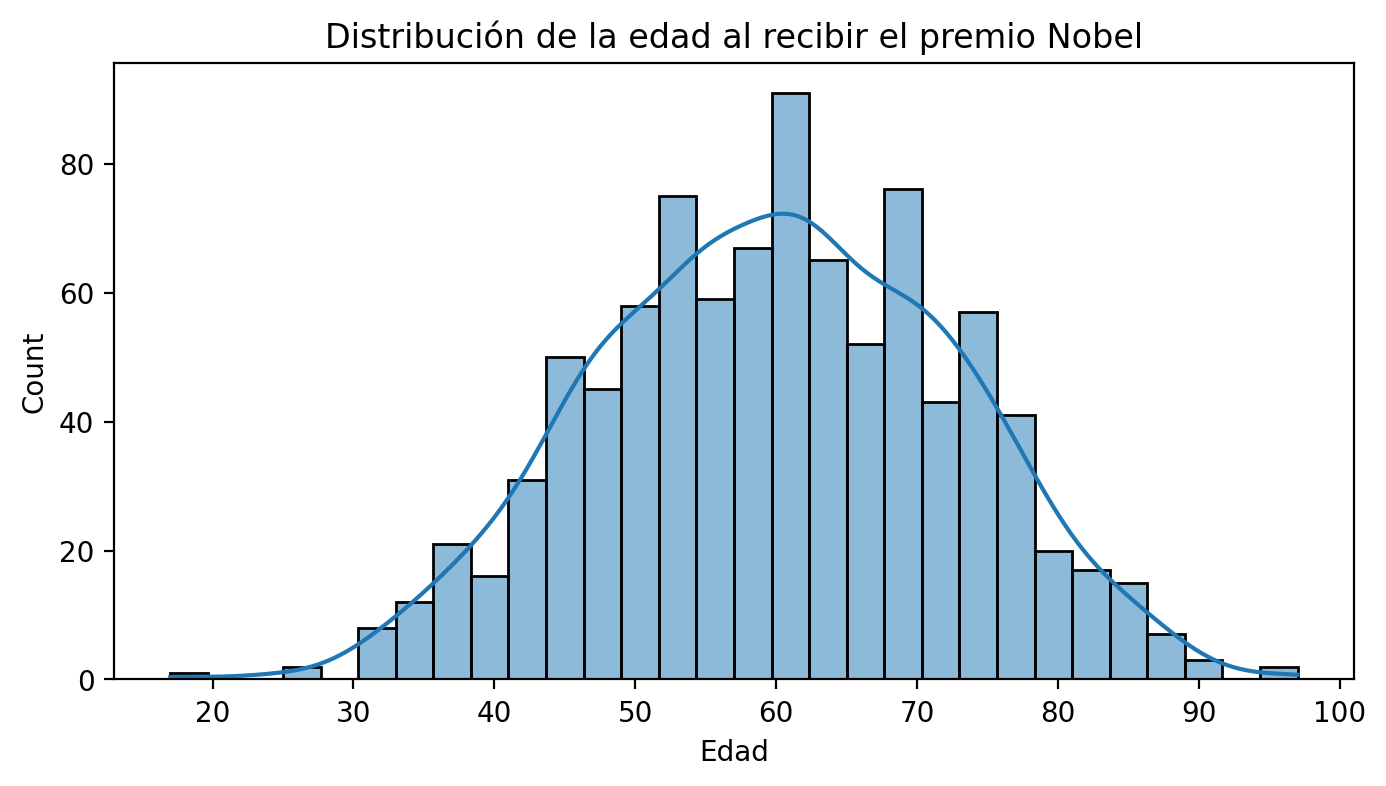

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data, x=df_data.edad_gan, bins=30, kde=True)
plt.xlabel('Edad')
plt.title('Distribución de la edad al recibir el premio Nobel')

media_edad = df_data.edad_gan.mean()
de_edad = df_data.edad_gan.std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_edad, de_edad)

plt.show()

Como se mencionó previamente, en los extremos del conjunto de datos se encuentran las dos personas mencionadas anteriormente, Malala y John. A primera vista, podrían ser interpretadas como valores atípicos; sin embargo, al explorar y comprender a fondo el conjunto de datos, se determina que representan individuos con las edades más baja y alta al momento de recibir el Premio Nobel. Además, al trazar una línea en la media del gráfico, que es de 60 años, se observa que la distribución se aproxima a una distribución normal. No obstante, para confirmar este patrón, sería necesario llevar a cabo pruebas de normalidad, como la prueba de Shapiro-Wilks o la de Pearson.

### Edad al ganar el premio Nobel a través de la historia.

De acuerdo con lo visto en los ejercicios anteriores, surgen las siguientes preguntas:

* ¿Los laureados con el premio Nobel están siendo nominados a más edad que antes?
* ¿Las edades de los laureados en el momento del premio han aumentado o disminuido con el tiempo?
* ¿Cuántos años tenían los laureados con el premio Nobel en los años 1900-1940 cuando se les otorgó el premio?
* ¿Qué edad prevería para un laureado con el premio Nobel en 2020?


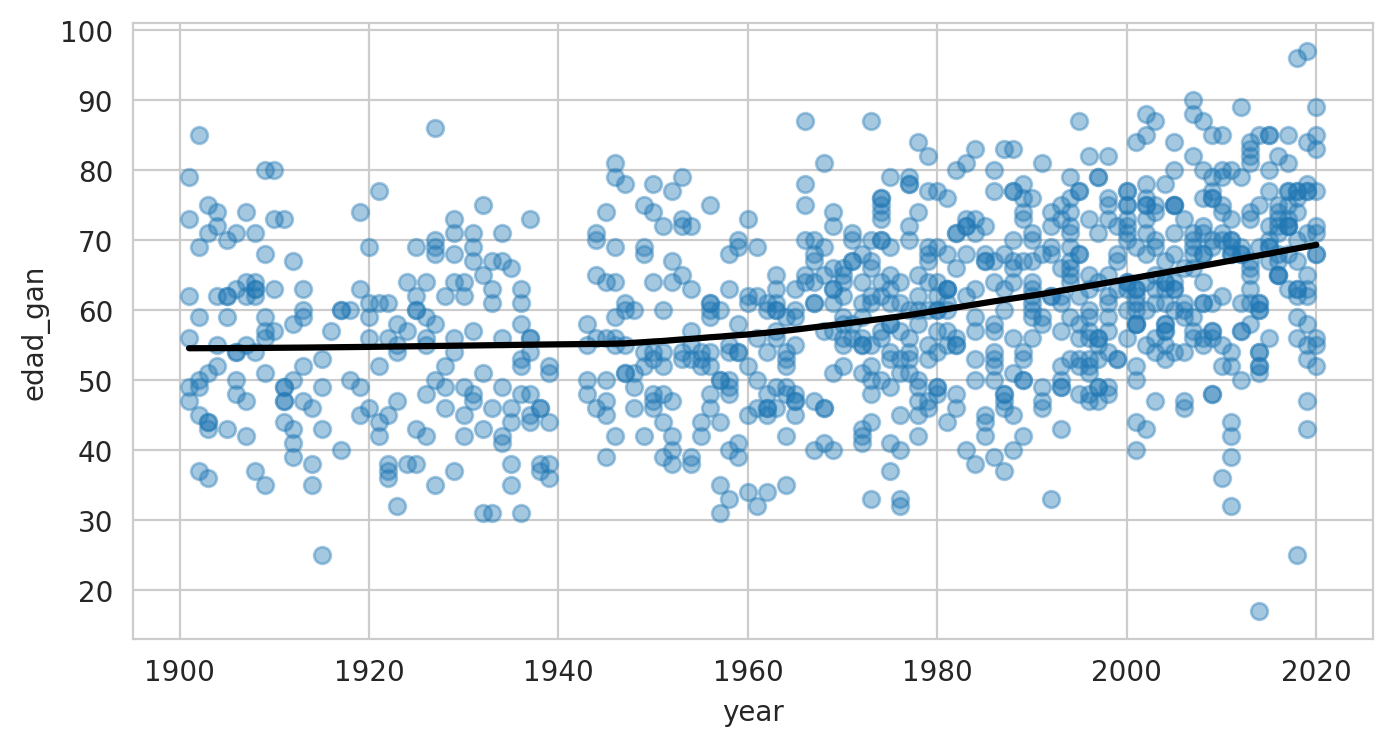

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='edad_gan',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

Utilizando el parámetro lowess es posible trazar una regresión lineal local, esto significa que la linea de mejor ajuste sigue siendo lineal, pero es más parecida a lo visto anterior mente como el promedio movil, que nos proporciona una forma no lineal en toda la serie del tiempo. Lo que observamos es sumamente interesante ya que confirma claramente cómo los ganadores o ganadoras están recibiendo su premio a mayor edad. Desde 1900 hasta alrededor de 1950, los galardonados tenían mas o menos 55 años, mientras que en la actualidad, se encuentra cerca de los 70 años cuando reciben el premio Nobel. Otra cuestión a observar es que el gráfico nos muestra que en los últimos 10 años la dispersión de edades ha aumentado, teniendo como conclusión que el rango de edades si ha tenido un incremento a la hora de ganar un premio Nobel.

### Edad de los ganadores a lo largo de las categorías.

* ¿Cuál es la variación entre los laureados por categoría?
* En qué categoría con el promedio de edad más alto?
* En qué categoría con el promedio de edad más bajo?

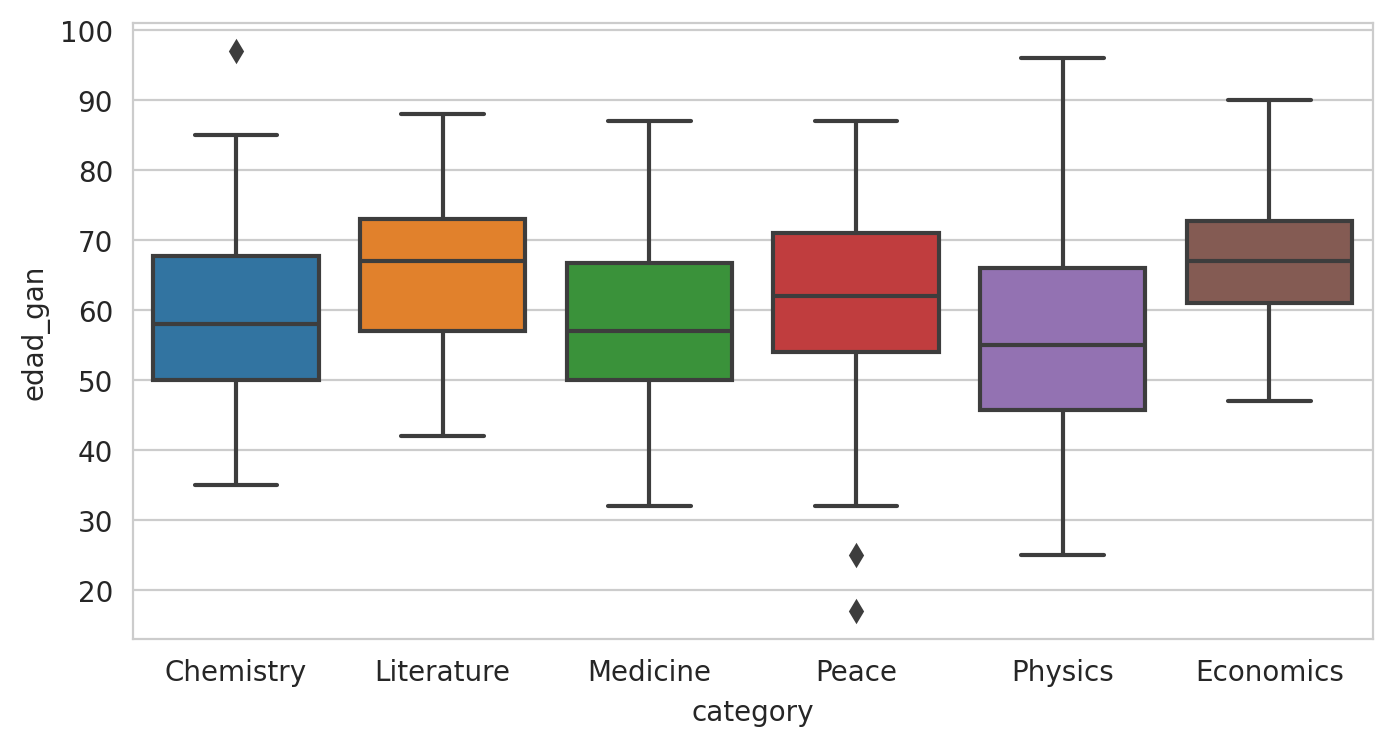

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='edad_gan')

plt.show()

Una de las herramientas más eficaces para el análisis descriptivo es el gráfico de caja y bigotes, ya que nos permite visualizar elementos clave como la mediana, los cuartiles, el rango intercuartílico, los valores atípicos, así como la simetría y la forma de distribución de los datos. En este caso particular, se destacan algunos valores atípicos en las categorías de paz y química.

Finalmente, es notable que la categoría con la mediana más baja es física, mientras que literatura es considerada la categoría con la mediana más alta en la edad de recepción del premio Nobel.


Ahora bien, para obtener una fotografía completa, visualizaremos cómo se ven las edades de los ganadores a lo largo de la historia por cada una de las categorías; anteriormente habíamos utilizado el boxplot para visualizar el dataset completo, sin embargo, ahora veremos cómo la biblioteca Seaborn tiene componentes gráficos para construir facilmente plots que muestran información de manera desagregada y dando mayor entendimiento a las preguntas que se plantean a continuación:

* ¿Cuál es la tendencia de las edades de los ganadores en cada categoría?
* ¿En qué categoría existe una tendencia positiva y en cual existe una tendencia negativa?


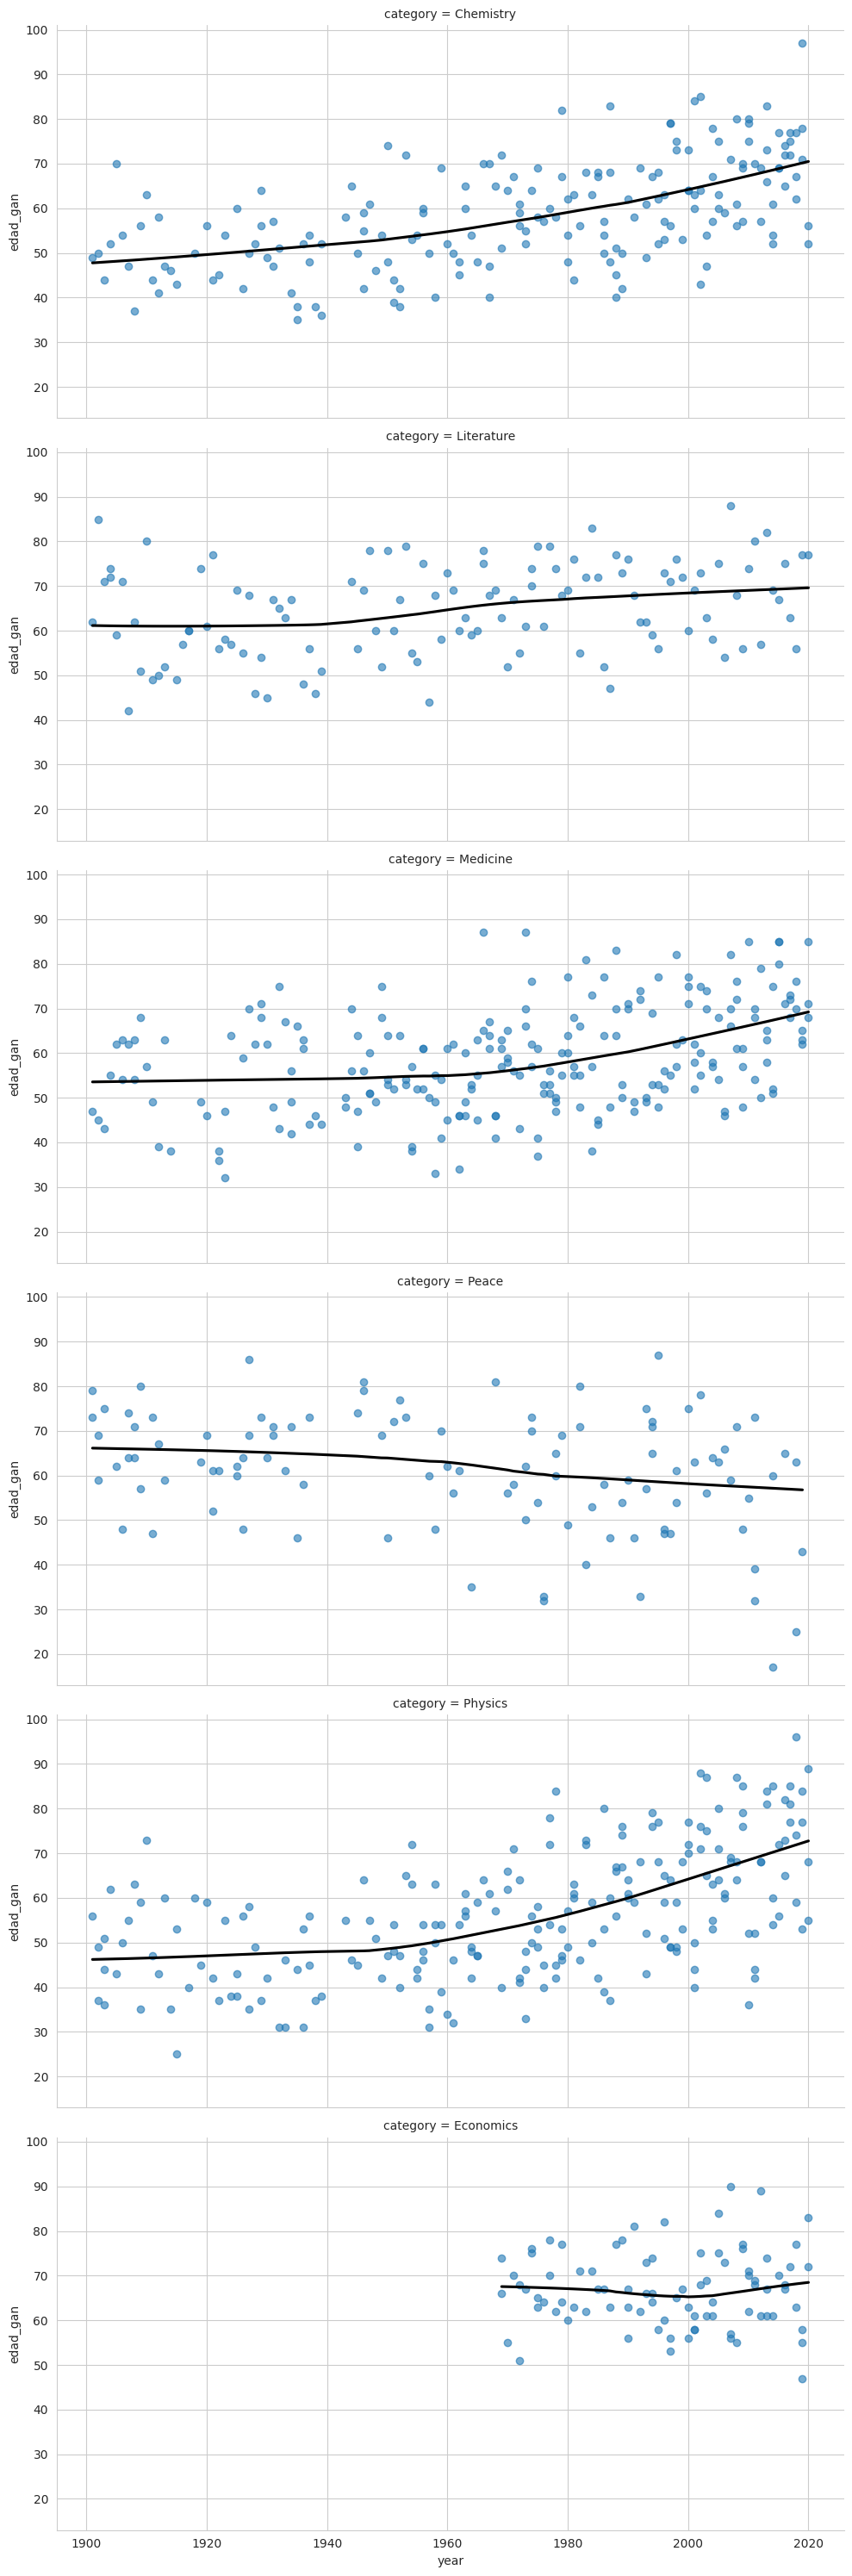

In [ ]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='edad_gan',
               row = 'category',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()

Observamos que a lo largo del tiempo, los galardonados en física, química y medicina han experimentado un envejecimiento. La tendencia al envejecimiento es particularmente notable en el ámbito de la física. La edad promedio solía situarse por debajo de los 50 años, pero en la actualidad supera los 70. En cambio, la categoría más reciente, economía, muestra una mayor estabilidad en este aspecto. Curiosamente, el premio de la paz revela una tendencia opuesta, donde los ganadores son cada vez más jóvenes. Por lo tanto, los gráficos de dispersión, que presentan líneas de mejor ajuste a lo largo del tiempo, y mienrtas que el diagrama de caja del conjunto de datos completo pueden contar historias notablemente diferentes.







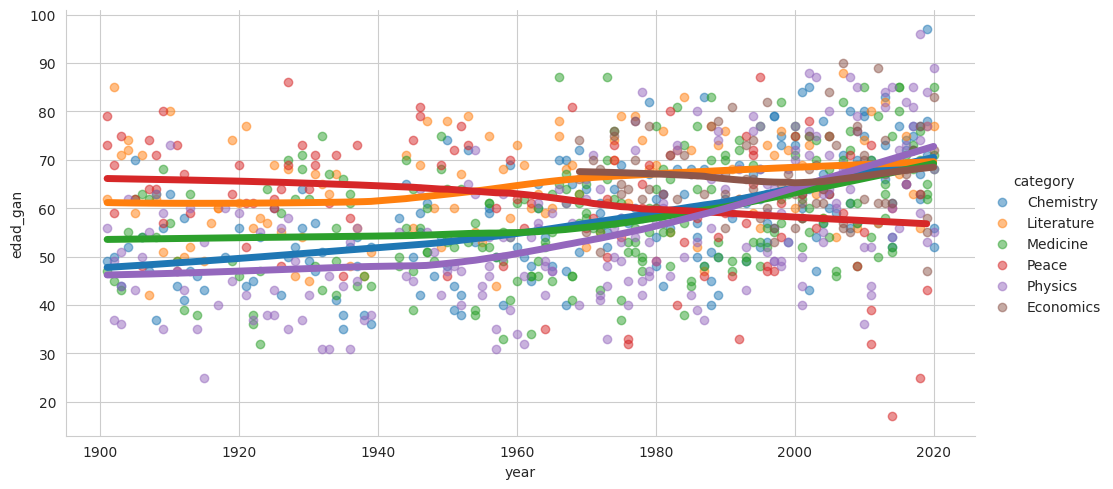

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='edad_gan',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()

El gráfico anterior muestra la dispersión con líneas de regresión local que muestra la relación entre 'year' y 'edad_gan' para diferentes categorías en el conjunto de datos, resaltando la tendencia a lo largo del tiempo en función de la categoría. Se aprecia lo que se comentó con anterioridad, la tendencia que sigue cada una de las categorías según la edad que se ganó el premio Nobel.

# Conclusiones

Recordar que el origen del Premio Nobel se encuentra dentro del testamento de Alfred Nobel en 1895, donde  establece como un legado creado por el mismo la creación de premios que honran a aquellos que realizaron contribucones significativas en campos específicos.

Inicio con una exploración inicial en donde se exploran las dimensiones del conjunto y se plantean preguntas clave para entender las características del mismo. Se investiga la existencia de duplicados NaN, identificando que parte de la información sobre organizaciones está relacionada principalmente con premios de la categoría de paz.

Se identifica que más del 90% de los premios otorgados a lo largo de la historia han sido para hombres, identificando una preponderancia del sexo masculino en los galardonados. Al identificar las primeras tres mujeres galardonadas, se observa que no estaban afiliadas a ninguna organización.

Por su parte, se identificaron a 6 ganadores que han sido galardonados más de una vez y se destaca que el Comité Internacional de la Cruz Roja ha ganado el mayor número de premios Nobel en la categoría de paz.

Se exploraron el número de premios por categoría, destacando que Medicina tiene la mayor cantidad de premios, seguido por Física y Química. Adicional, se identifica que el premio de Economía, se empezó a otorgarse a finales de los años 60's.

También se realizó un análisis temporal, donde se muestra cómo el número de premios ha variado a lo largo de los años, destacanto disminuciones durante los sucesos históricos de las guerras mundiales. Se buscó crear un gráfico de media movil que sugiere la relación entre el aumento de premios y la disminución del porcentaje compartido por cada premio.

Asimismo, se realizó un análisis por países y ciudades, donde se examinaron los nombres actuales de los países en donde nacieron los galardonados del premio Nobel para determinar  los países con mayor número de premios Nobel. En este contexto, se observó que la Universidad de Califormia fue la organización con más premios Nobel.

Por último, se realizó el calculo de una nueva variable para determinar la edad de los ganadores, identificando  a Malala Yousafzai como la persona más jóven en recibir el premio y John Goodenough como la persona más anciana.

En conclusión, el análisis proporciona una visión profunda y detallada de diversos aspectos de los premios Nobel a lo largo del tiempo, explorando patrones, tendencias y características demográficas de los galardonados.


* Pandas: Se utiliza extensivamente para la manipulación y limpieza de datos. Pandas facilita la exploración de las dimensiones del conjunto de datos, la identificación de duplicados, y la gestión de los valores NaN.
* Matplotlib y Seaborn: Se utilizan para crear visualizaciones efectivas, como gráficos de caja y bigotes, diagramas de dispersión, y gráficos de regresión local. Estas bibliotecas permiten una comprensión más profunda de la distribución de datos y las tendencias a lo largo del tiempo.
Plotly: Se utiliza para crear visualizaciones interactivas, como gráficos de barras y sunburst. Plotly agrega una dimensión interactiva al análisis, lo que facilita la exploración de datos específicos.
* NumPy: Aunque no se menciona explícitamente, es probable que NumPy se haya utilizado para operaciones numéricas eficientes, especialmente al realizar cálculos relacionados con estadísticas descriptivas.
Exploración de Datos:

Se abordan preguntas clave sobre el conjunto de datos, como las dimensiones, duplicados, y la presencia de valores NaN. La atención se centra en comprender la calidad de los datos antes de realizar análisis más profundos.
Análisis de Género:

Se utiliza Pandas para filtrar y analizar datos específicos sobre género, identificando las primeras mujeres ganadoras y proporcionando insights sobre la proporción de género en los premios Nobel.
Visualización Temporal:

Se emplea Matplotlib y Seaborn para crear gráficos temporales que muestran la evolución del número de premios a lo largo de los años. Se destaca el impacto de eventos históricos, como las guerras mundiales, en la entrega de premios.
Análisis de Países y Ciudades:

Se utilizan diversas bibliotecas para explorar y visualizar datos geográficos, identificando los países y ciudades con mayor representación en los premios Nobel.

* Análisis de Edad: Se realiza un análisis detallado de la edad de los ganadores utilizando Seaborn y Matplotlib. Se presentan gráficos de dispersión y regresión local para entender las tendencias a lo largo del tiempo.
Interactividad con Plotly:

Plotly se utiliza para crear gráficos interactivos, como el sunburst que muestra la distribución de premios en términos de países, ciudades y organizaciones.
En conclusión, el código demuestra un enfoque integral para el análisis de datos, aprovechando diversas bibliotecas de Python para manipulación y visualización. El uso de herramientas interactivas como Plotly mejora la experiencia del usuario al permitir la exploración detallada de datos. Además, el código aborda preguntas específicas sobre género, temporalidad, geografía y edad, proporcionando una visión completa de la historia de los premios Nobel.





